Below is a **step-by-step** guide to working through the early examples (Malthusian and Logistic growth models) in Python. We’ll start with an outline of what we’ll do, then dive into code snippets you can run in a Jupyter notebook (or any Python environment). We’ll gradually build up both **symbolic** (analytical) and **numerical** solutions, plus some basic plots to visualize them.


# 0. Getting Set Up

1. **Python environment**: 
   - If you don’t have a Jupyter environment already, install [Anaconda](https://www.anaconda.com/) or set up a virtual environment with `pip install jupyter sympy numpy scipy matplotlib`.
2. **Launch a Jupyter notebook** by running `jupyter notebook` (or `jupyter lab`) in your terminal.
3. **Create a new notebook** and start coding!


In [10]:
!pip install jupyter sympy numpy scipy matplotlib


# 1. Malthusian Model

The **Malthusian** (exponential growth/decay) model is

\[
\frac{dN}{dt} \;=\; r \, N(t),
\]

where:
- \(N(t)\) is the population at time \(t\).
- \(r\) is the intrinsic growth rate (if \(r>0\), the population grows exponentially; if \(r<0\), it decays).

## 1.1 Symbolic Analysis (using Sympy)

Let’s symbolically solve this ODE:

\[
\frac{dN}{dt} = rN 
\quad \Longrightarrow \quad
N(t) = N_0 \, e^{r t}.
\]

In Python/Sympy, we can do:

- `ics={N.subs(t,0): sympy.Symbol('N0')}` tells Sympy that \(N(0)=N_0\).  
- The output should be something like \(N(t) = N0 \exp(r \, t)\).

### Interpreting the Solution

- If \(r>0\), solution **grows** without bound (\(e^{rt}\)).
- If \(r<0\), solution **decays** to 0 as \(t \to \infty\).
- No equilibrium other than \(N=0\), which is stable if \(r<0\) and unstable if \(r>0\).

In [11]:
import sympy
from sympy import symbols, Function, dsolve, Eq, diff

# Define the symbols
t = symbols('t', real=True, nonnegative=True)
r = symbols('r', real=True)
N = Function('N')(t)

# Define the ODE: dN/dt = r*N
ode_malthus = Eq(diff(N, t), r*N)
print(ode_malthus)

# Solve symbolically
sol_malthus = dsolve(ode_malthus, ics={N.subs(t, 0): sympy.Symbol('N0')})
sol_malthus


Eq(Derivative(N(t), t), r*N(t))


Eq(N(t), N0*exp(r*t))


## 1.2 Numerical Simulation & Plot

Let’s do a quick numerical example with `odeint` from `scipy.integrate`. We’ll pick \(r=0.5\) per day, say, and \(N(0)=10\).


- You’ll see an exponential curve if \(r_val>0\).  
- Try setting `r_val = -0.5` to see a decay.


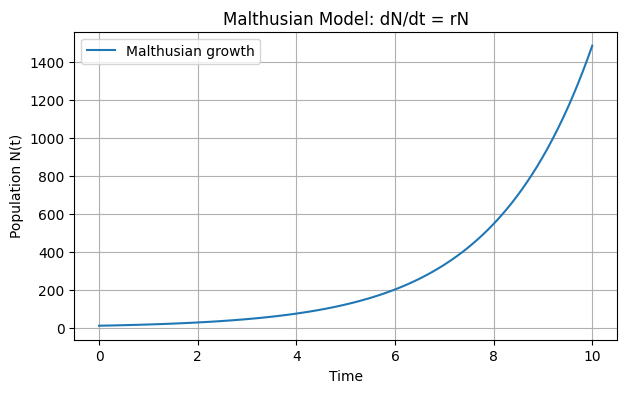

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Malthusian ODE as a Python function
def malthusian_deriv(N, t, r):
    return r * N

# Parameters
r_val = 0.5
N0 = 10.0
t_vals = np.linspace(0, 10, 100)  # time from 0 to 10 days

# Integrate
sol = odeint(malthusian_deriv, N0, t_vals, args=(r_val,))

# Plot
plt.figure(figsize=(7,4))
plt.plot(t_vals, sol, label='Malthusian growth')
plt.title("Malthusian Model: dN/dt = rN")
plt.xlabel("Time")
plt.ylabel("Population N(t)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Logistic Growth

The **Logistic** model (Verhulst 1838) is:

\[
\frac{dN}{dt} \;=\; r \, N(t)\,\Bigl(1 - \frac{N(t)}{K}\Bigr),
\]

where:
- \(K\) is the **carrying capacity**.
- \(r\) is still the intrinsic growth rate.

## 2.1 Steady States & Stability

1. **Steady states** occur when \(dN/dt = 0\), i.e. \(N = 0\) or \(N = K\).
2. **Stability**:
   - At \(N^*=0\): if you take a small perturbation, the derivative near 0 is \(f'(0) = r(1 - 0/K) = r\). 
     - If \(r>0\), \(f'(0)>0\)\(\to\) **unstable**.
   - At \(N^*=K\): derivative near \(K\) is \(f'(K) = r(1 - 2K/K) = -r\). 
     - If \(r>0\), \(f'(K)<0\)\(\to\) **stable**.

Hence, the population **tends** to grow from any positive initial condition \(N_0\) and approach \(K\) (assuming \(r>0\)).

## 2.2 Symbolic Solution

We know the well-known logistic solution:

\[
N(t) = \frac{K}{\;1 + \Bigl(\frac{K}{N_0}-1\Bigr) e^{-r t}}.
\]

But let’s see how Sympy does it:


Sympy will return a solution that you can interpret, but you’ll have a constant of integration. You can then apply the initial condition \(N(0)=N_0\) by hand or by specifying `ics` with some numeric placeholders. Sometimes Sympy’s closed-form might look different but is mathematically equivalent to the standard formula.

In [13]:
t = symbols('t', real=True, nonnegative=True)
r, K = symbols('r K', positive=True)
N = Function('N')(t)

logistic_ode = Eq(diff(N, t), r*N*(1 - N/K))

# We can't specify initial condition with K, N0 as direct symbols easily, 
# so let's just see the general solution:
sol_logistic = dsolve(logistic_ode)
sol_logistic

Eq(N(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

## Stability Analysis for the Logistic Equation

We'll verify the stability of the equilibria \( N^* = 0 \) and \( N^* = K \) by:

1. **Finding equilibria** where \( f(N) = 0 \).
2. **Evaluating the derivative** \( f'(N) \) at each equilibrium.
3. **Checking the sign** of \( f'(N^*) \) to determine if each equilibrium is stable or unstable.


In [14]:
import sympy
from sympy import symbols, Function, diff, Eq, solve

# 1. Define symbols and function
t = symbols('t', real=True, nonnegative=True)
r, K = symbols('r K', positive=True)
N = Function('N')(t)

f = r*N*(1 - N/K)  # logistic right-hand side

# 2. Compute derivative of f wrt N
df_dN = diff(f, N)

# 3. Solve for equilibria f(N)=0
equilibria = solve(Eq(f, 0), N)

# 4. Evaluate derivative at each equilibrium to determine stability
print("Logistic ODE: dN/dt = r*N*(1 - N/K)\n")

print(f"Equilibria: {equilibria}\n")

for eq in equilibria:
    dval = df_dN.subs(N, eq)
    print(f"At N* = {eq}: f'(N*) = {dval}")
    if dval < 0:
        print(" -> STABLE\n")
    elif dval > 0:
        print(" -> UNSTABLE\n")
    else:
        print(" -> NEUTRAL (dval=0)\n")


Logistic ODE: dN/dt = r*N*(1 - N/K)

Equilibria: [0, K]

At N* = 0: f'(N*) = r
 -> UNSTABLE

At N* = K: f'(N*) = -r
 -> STABLE






## 2.3 Numerical Integration & Plot

We’ll do the same approach as before with `odeint`:



### Experiments
- Try changing \(N_0\) (e.g., from 5 to 80) and see how the solution behaves relative to \(K=50\).
- Try different \(r\) values. Big \(r\) means the population converges to \(K\) quickly.

### Observations
- **\(N(t)\to K\)** as \(t\to \infty\) if \(r>0\).
- If \(r<0\), the term \(\bigl(1 - \frac{N}{K}\bigr)\) is still negative for large \(N\), so the solution decays to 0. (Not the usual logistic scenario, but mathematically possible.)


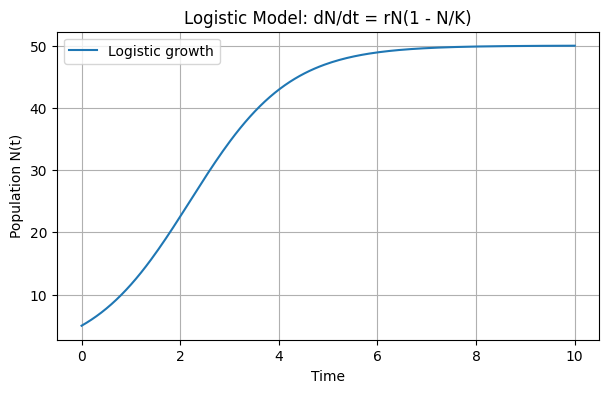

In [15]:
def logistic_deriv(N, t, r, K):
    return r*N*(1 - N/K)

# Parameters
r_val = 1.0
K_val = 50.0
N0 = 5.0
t_vals = np.linspace(0, 10, 200)

# Integrate
sol_logistic = odeint(logistic_deriv, N0, t_vals, args=(r_val, K_val))

# Plot
plt.figure(figsize=(7,4))
plt.plot(t_vals, sol_logistic, label='Logistic growth')
plt.title("Logistic Model: dN/dt = rN(1 - N/K)")
plt.xlabel("Time")
plt.ylabel("Population N(t)")
plt.grid(True)
plt.legend()
plt.show()


---

# 3. Key Lessons from Sections 1.1–1.2

1. **Malthus vs. Logistic**  
   - Malthus: exponential growth/decay. No upper bound.  
   - Logistic: introduces *population self-limitation* via carrying capacity \(K\).
2. **Equilibria**  
   - Malthus: equilibrium at \(N=0\).  
   - Logistic: equilibria at \(N=0\) (unstable if \(r>0\)) and \(N=K\) (stable if \(r>0\)).
3. **Interpreting \(r\) and \(K\)**  
   - \(r\) has units 1/time; it’s a *per capita* growth rate.  
   - \(K\) is a population size (or density) that environment can sustain.

---

# 4. Next Steps Toward More Complex Models

We’ve now established how to:
1. Use **Sympy** for symbolic solutions of ODEs.
2. Use **`odeint`** (SciPy) for numerical simulations.
3. Plot the results with **matplotlib**.

As we move deeper (Sections 1.2–1.6, up to age-structured PDEs), we’ll build on these same coding steps:

1. **Define the model** in Python (the right-hand side of \(\frac{dN}{dt}=f(N)\) or something more complex).
2. **Look for equilibria** (sometimes by `sympy.solve(...)`).
3. **Check stability** by derivatives at the equilibria or using Jacobians in multi-dimensional cases.
4. **Simulate** with `odeint` or specialized PDE/delay solvers.
5. **Plot & interpret**.

For example, in the next sections you’d look at:
- **Spruce Budworm** (adds a predation term).
- **Delay Models** (need a DDE solver, like `ddeint` in Python).
- **Harvesting** (modify logistic with a harvest term).
- **Age-structured PDE** (the Von Foerster equation) requires PDE or method-of-characteristics approach.

But the workflow is always: write the equation, pick a solver, interpret.




## Wrapping Up

This should give you a **hands-on** coding approach for Sections 1.1 (Malthus) and 1.2 (Logistic). Feel free to:

- Tweak parameters to see different behaviors.
- Compare symbolic and numeric solutions for consistency.
- Add random noise to initial conditions, or do parameter sweeps, to explore robustness.

Once you’re comfortable, we’ll move on to Section 1.2’s insect outbreak or Section 1.3’s delay equations with the same style: define ODE (or DDE), solve, plot, interpret. Let me know whenever you’re ready to dig into the next example—**that’s** where things get more interesting!